# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 


While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).`

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('2022-12-11-washington-post-police-shootings-export.csv', encoding="windows-1252")

## EDA, cleaning and visualizations

In [5]:
df_hh_income[df_hh_income['Geographic Area']=='(X)']

,Geographic Area,City,Median Income


In [6]:
df_pct_completed_hs.isna().values.any()

False

In [7]:
df_pct_poverty.duplicated().values.any()

False

In [8]:
df_share_race_city.duplicated().values.any()

False

In [9]:
df_fatalities

,date,name,age,gender,armed,race,city,state,flee,body_camera,signs_of_mental_illness,police_departments_involved
0,2015-01-02,Lewis Lee Lembke,47.00,male,gun,White,Aloha,OR,not,False,False,"Washington County Sheriff's Office, OR"
1,2015-01-02,Tim Elliot,53.00,male,gun,Asian,Shelton,WA,not,False,True,"Mason County Sheriff's Office, WA"
2,2015-01-03,John Paul Quintero,23.00,male,unarmed,Hispanic,Wichita,KS,not,False,False,"Wichita Police Department, KS"
3,2015-01-04,Kenneth Joe Brown,18.00,male,gun,White,Guthrie,OK,not,False,False,"Oklahoma Highway Patrol, OK"
4,2015-01-04,Michael Rodriguez,39.00,male,other,Hispanic,Evans,CO,not,False,False,"Evans Police Department, CO"
...,...,...,...,...,...,...,...,...,...,...,...,...
7999,2022-12-05,NaN,NaN,NaN,blunt_object,Unknown,Seeley,CA,NaN,False,False,"Imperial County Sheriff's Department, CA"
8000,2022-12-05,James West Jr.,39.00,male,gun,NaN,Memphis,TN,foot,False,False,"Memphis Police Department, TN"
8001,2022-12-05,NaN,NaN,male,gun,NaN,St. Paul,MN,foot,False,False,"St. Paul Police Department, MN"
8002,2022-12-06,NaN,NaN,male,undetermined,NaN,Fresno,CA,foot,False,False,"Fresno County Sheriff's Office, CA"


In [10]:
df_hh_income['Median Income']=df_hh_income['Median Income'].fillna(0)
df_hh_income['Median Income'].replace(to_replace="-", value=0, regex=True, inplace=True)
df_hh_income['Median Income'].replace(to_replace="(X)", value=0, regex=True, inplace=True)
df_hh_income['Median Income'].replace(to_replace="250,000+", value=250000, regex=True, inplace=True)
df_hh_income['Median Income']=pd.to_numeric(df_hh_income['Median Income'])

In [11]:
df_fatalities[df_fatalities.date.isna()]

,date,name,age,gender,armed,race,city,state,flee,body_camera,signs_of_mental_illness,police_departments_involved


In [12]:
df_pct_poverty.poverty_rate.replace(to_replace="-", value=0, regex=True, inplace=True)
df_pct_poverty.poverty_rate=pd.to_numeric(df_pct_poverty.poverty_rate)

In [13]:
pov_by_state=df_pct_poverty.groupby('Geographic Area').mean().round(2).sort_values(by='poverty_rate')
px.bar(x=pov_by_state.index,  y=pov_by_state.poverty_rate,
labels={'x': 'US State', 'y': 'Average poverty rate'},
color=pov_by_state.poverty_rate)

In [14]:
highest_state=pov_by_state[pov_by_state['poverty_rate']==pov_by_state['poverty_rate'].max()].index[0]
lowest_state=pov_by_state[pov_by_state['poverty_rate']==pov_by_state['poverty_rate'].min()].index[0]
print(f"{highest_state} has the highest poverty rate which equals to {pov_by_state['poverty_rate'].max()}.")
print(f"{lowest_state} has the lowest poverty rate which equals to {pov_by_state['poverty_rate'].min()}.")

MS has the highest poverty rate which equals to 26.88.
NJ has the lowest poverty rate which equals to 8.16.


In [15]:
df_pct_completed_hs.percent_completed_hs.replace(to_replace="-", value=0, regex=True, inplace=True)
df_pct_completed_hs.percent_completed_hs=pd.to_numeric(df_pct_completed_hs.percent_completed_hs)

In [16]:
hs_by_state=df_pct_completed_hs.groupby('Geographic Area').mean().round(2).sort_values(by='percent_completed_hs')
px.bar(x=hs_by_state.index,  y=hs_by_state.percent_completed_hs,
labels={'x': 'US State', 'y': 'Average High School Graduation Rate'},
color=hs_by_state.percent_completed_hs)

In [17]:
highest_grad=hs_by_state[hs_by_state['percent_completed_hs']==hs_by_state['percent_completed_hs'].max()].index[0]
lowest_grad=hs_by_state[hs_by_state['percent_completed_hs']==hs_by_state['percent_completed_hs'].min()].index[0]
print(f"{highest_grad} has the highest high school graduation rate which equals to {hs_by_state['percent_completed_hs'].max()} %.")
print(f"{lowest_grad} has the lowest high school graduation rate which equals to {hs_by_state['percent_completed_hs'].min()} %.")

MA has the highest high school graduation rate which equals to 92.03 %.
TX has the lowest high school graduation rate which equals to 74.09 %.


(8.0, 27.0)

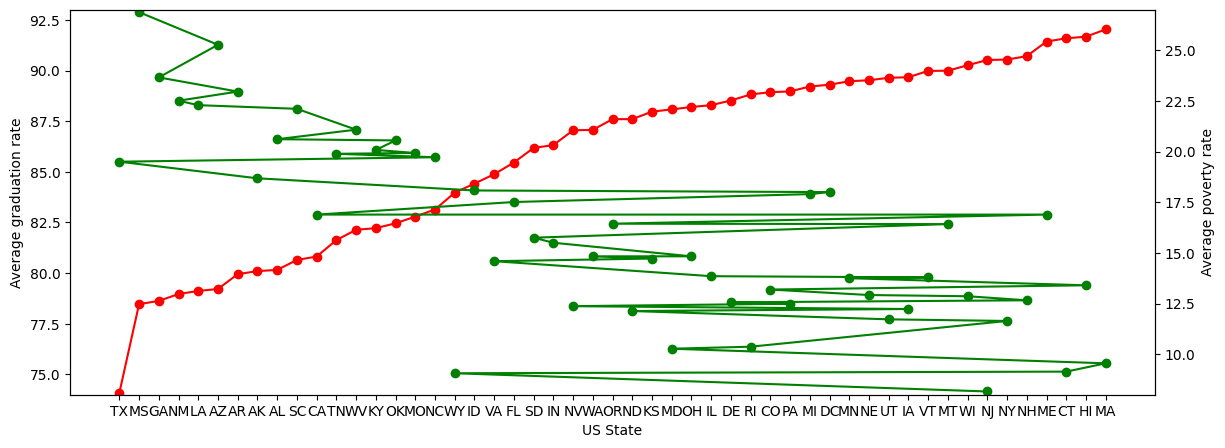

In [18]:
plt.figure(figsize=(14,5))
ax1=plt.gca()
ax2=ax1.twinx()
ax1.plot(hs_by_state, color='red', marker='o')
ax1.set_xlabel("US State")
ax1.set_ylabel("Average graduation rate")
ax1.set_ylim([74,93])
ax2.plot(pov_by_state,marker='o', color='green')
ax2.set_ylabel("Average poverty rate")
ax2.set_ylim([8,27])

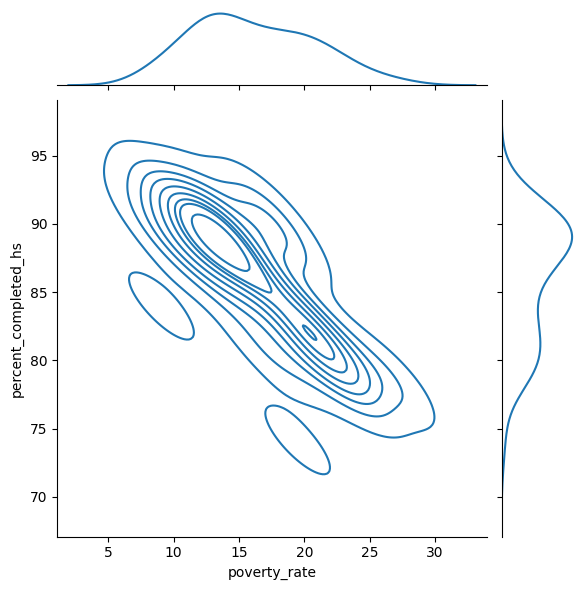

In [19]:
sns.jointplot(x=pov_by_state.poverty_rate, y=hs_by_state.percent_completed_hs, kind='kde')

<Axes: xlabel='poverty_rate', ylabel='percent_completed_hs'>

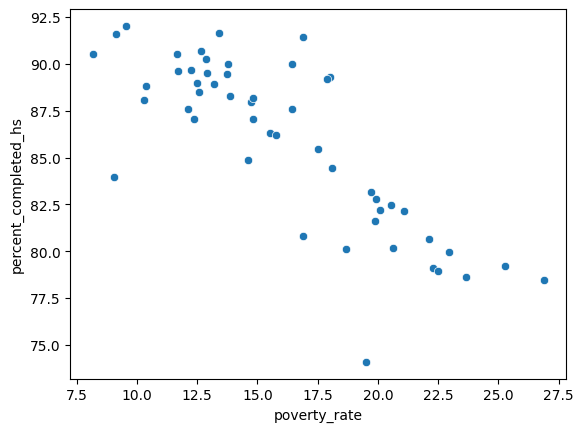

In [20]:
sns.scatterplot(x=pov_by_state.poverty_rate, y=hs_by_state.percent_completed_hs)

<Axes: xlabel='poverty_rate', ylabel='percent_completed_hs'>

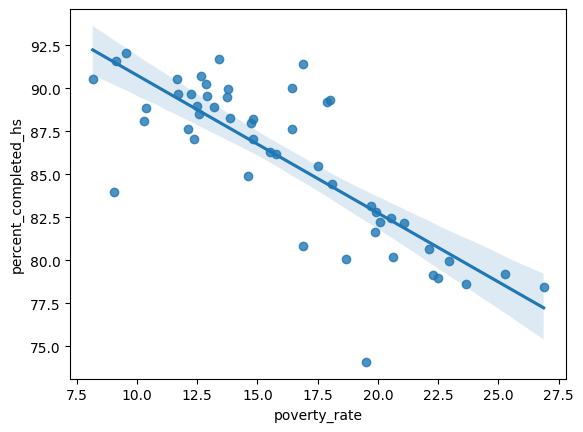

In [21]:
sns.regplot(x=df_pct_poverty.groupby('Geographic Area').mean().round(2), y=df_pct_completed_hs.groupby('Geographic Area').mean().round(2))

In [22]:
share_cols=df_share_race_city[df_share_race_city.columns[2:]].columns
for col in share_cols:
    df_share_race_city[col].replace(to_replace="(X)", value=0, regex=True, inplace=True)
df_share_race_city[share_cols]=df_share_race_city[share_cols].apply(pd.to_numeric)

In [23]:
race_by_state=df_share_race_city.groupby("Geographic area").mean().round(2).reset_index()
px.bar(race_by_state, x='Geographic area', y=share_cols,
labels={'Geographic area': 'US State', 'value': 'Average Rate Per Race'}, title='Racial Makeup of Each US State')

For most of the US cities, sum of the percentages is more than 100 and it is not logical. This means that data in table is not completely correct. As a result average percentages per us states is also not correct, as we see in the above graphics and below table.

In [24]:
race_by_state['Total']=race_by_state[share_cols].sum(axis=1)
race_by_state.sample(5)

,Geographic area,share_white,share_black,share_native_american,share_asian,share_hispanic,Total
4,CA,71.54,2.68,1.72,5.54,29.51,110.99
28,ND,92.29,0.36,5.33,0.29,1.82,100.09
50,WY,91.92,0.40,3.08,0.39,5.99,101.78
43,TX,82.40,5.87,0.66,1.01,39.28,129.22
18,LA,64.81,30.78,0.96,0.79,2.98,100.32


In [25]:
# To visualize the ones for which total percentage equals to 100 percent: 
df_share_race_city['Sum']=df_share_race_city[share_cols].sum(axis=1)
px.bar(df_share_race_city[df_share_race_city.Sum==100].groupby('Geographic area').mean().reset_index(), x='Geographic area', y=share_cols,
labels={'Geographic area': 'US State', 'value': 'Average Rate Per Race'}, title='Racial Makeup of Each US State')

In [26]:
fatal_by_race=df_fatalities.race.value_counts()
px.pie(names=fatal_by_race.index, values=fatal_by_race.values, hole=0.4)

In [27]:
fatal_by_sex=df_fatalities.gender.value_counts()
px.bar(x=fatal_by_sex.index, y=fatal_by_sex.values, color=fatal_by_sex.index,
labels={'x': 'Gender', 'y': 'Number of men and women'})

In [28]:
fatal_by_arm=df_fatalities.armed.value_counts()
print(f"{round(fatal_by_arm[fatal_by_arm.index!='unarmed'].sum()/fatal_by_arm.sum()*100,2)} % of people killed by police were armed.")

94.1 % of people killed by police were armed.


In [29]:
px.bar(fatal_by_arm.nlargest(n=10), x=fatal_by_arm.nlargest(n=10).index, y=fatal_by_arm.nlargest(n=10).values,
labels={'x': 'Top 15 type of weapon', 'y': 'Number of deaths'})

In [30]:
kill_under_25=df_fatalities.age.value_counts()
print(f'{round(kill_under_25[kill_under_25.index<25].sum()/kill_under_25.sum()*100,2)} % people killed by police were under 25 years old.')

15.79 % people killed by police were under 25 years old.


<Axes: xlabel='age', ylabel='Count'>

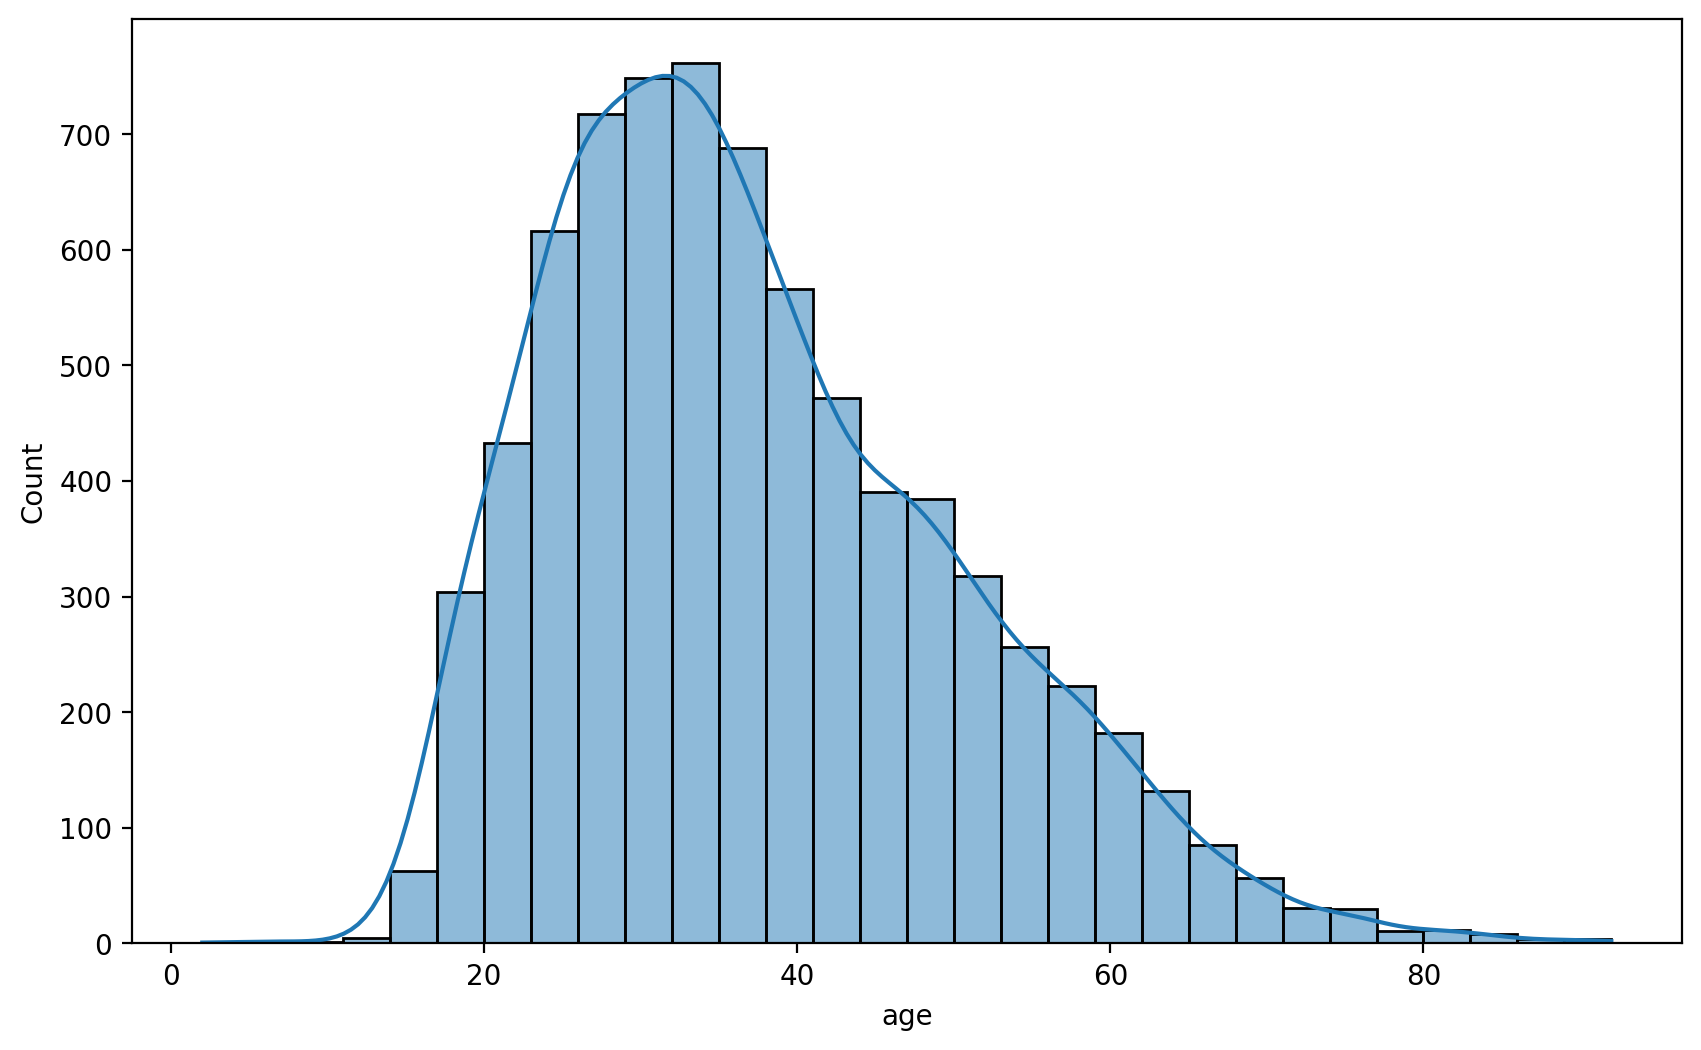

In [31]:
plt.figure(figsize=(10,6),dpi=200)
sns.histplot(df_fatalities, x='age', bins=30, kde=True)

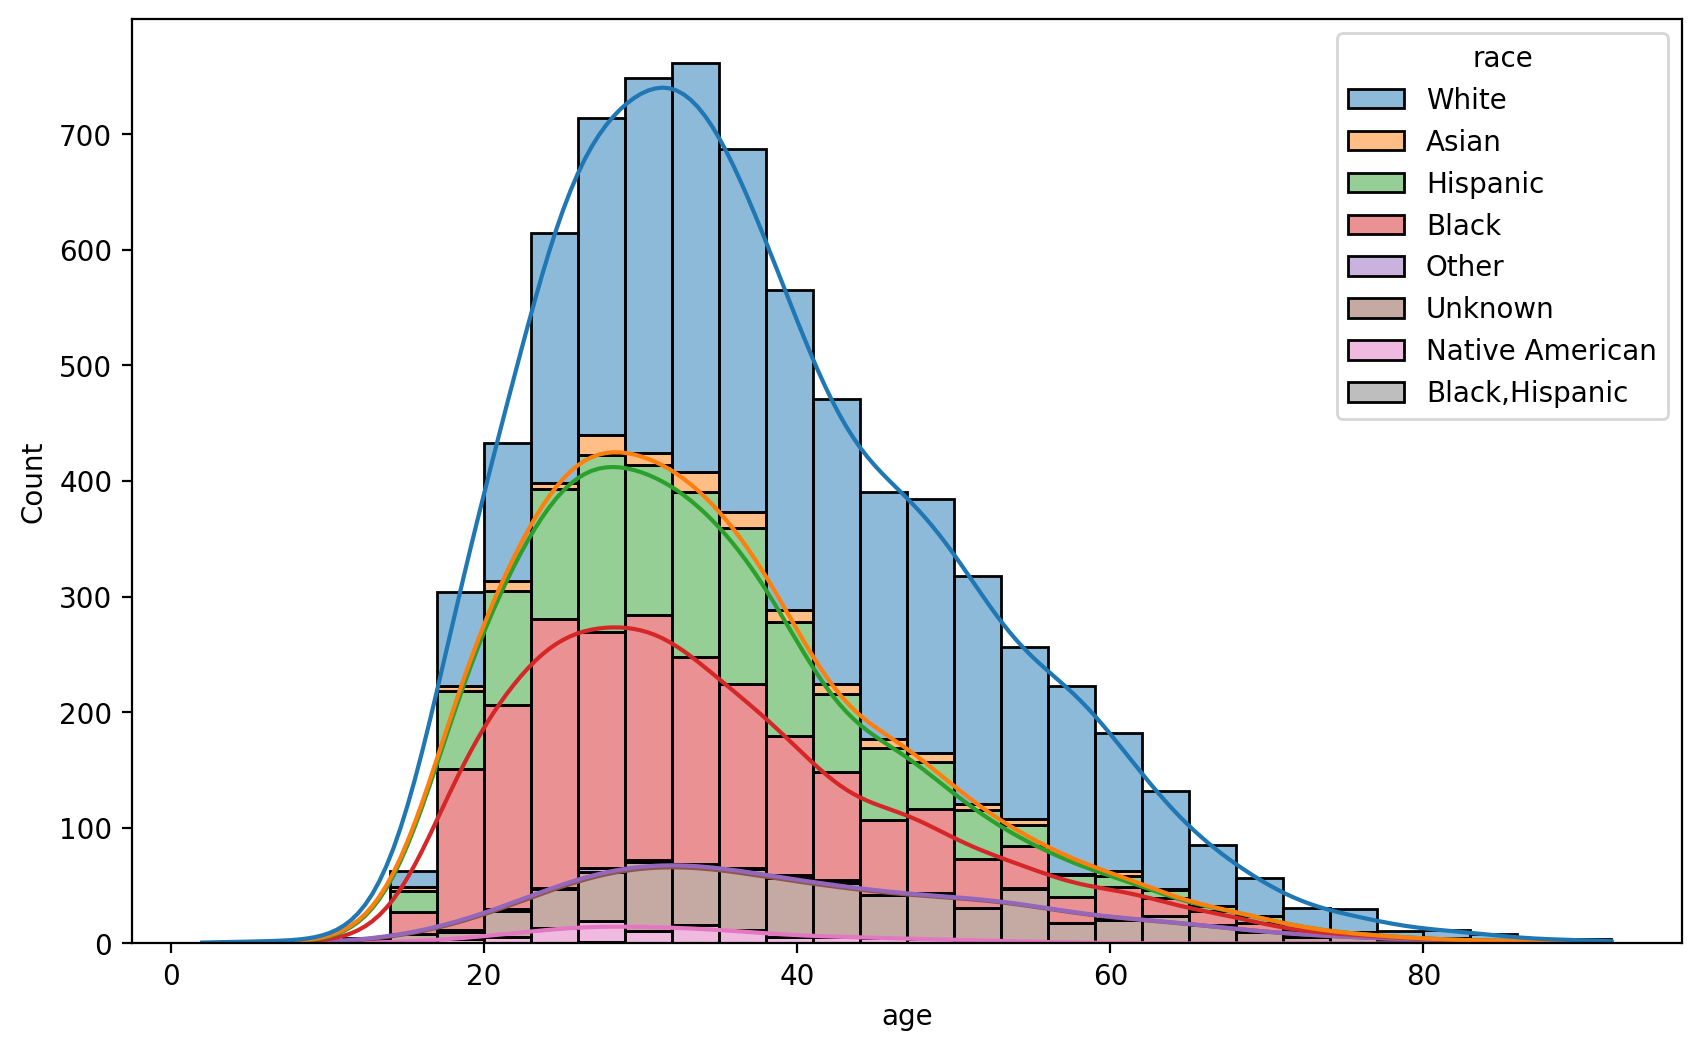

In [32]:
plt.figure(figsize=(10,6),dpi=200)
sns.histplot(df_fatalities, x='age', bins=30, kde=True, hue='race', multiple='stack');

In [33]:
px.bar(x=fatal_by_race.index, y=fatal_by_race.values, color=fatal_by_race.index,
labels={'x': 'Race', 'y': 'Number of deaths'}, title='Race of people killed')

In [34]:
kill_by_ill=df_fatalities.signs_of_mental_illness.value_counts()
print(f"{round(kill_by_ill[kill_by_ill.index==True].sum()/kill_by_ill.sum()*100,2)} % of people killed by police have been diagnosed with a mental illness.")

20.9 % of people killed by police have been diagnosed with a mental illness.


In [35]:
kill_by_city=df_fatalities.city.value_counts().reset_index()
px.bar(kill_by_city.nlargest(10, columns='city'), x='index', y='city', color='index',
labels={'index': 'City', 'city': 'Number of deaths'})

In [36]:
top10_city=df_fatalities.city.value_counts().nlargest(n=10).index
px.pie(df_fatalities[df_fatalities.city.isin(top10_city)].race.value_counts().reset_index(), names='index', values='race')

In [37]:
race_by_top10city=df_fatalities[df_fatalities.city.isin(top10_city)].groupby(['city', 'race']).size().reset_index(name="Count")
race_by_top10city['Percentage']=df_fatalities[df_fatalities.city.isin(top10_city)].groupby(['city', 'race']).size().groupby(level=0).apply(lambda x: 100*x/float(x.sum())).values
px.bar(race_by_top10city, x='city', y='Count', color='race',
text=race_by_top10city['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)),
labels={'city':'Top 10 City', 'Count': 'The number of deaths per city'},
title='The rate of death by race in Top 10 cities ')

In [38]:
px.choropleth(pov_by_state, locations=pov_by_state.index, color='poverty_rate',
color_continuous_scale="Matter",scope='usa', locationmode='USA-states')

In [41]:
pov_by_state.reset_index().nlargest(n=5, columns='poverty_rate')

,Geographic Area,poverty_rate
50,MS,26.88
49,AZ,25.27
48,GA,23.66
47,AR,22.96
46,NM,22.51


In [51]:
plt.figure(figsize=(10,6),dpi=200)
kill_by_state=df_fatalities.groupby('state').size().reset_index(name='Count')
fig=px.choropleth(kill_by_state, locations='state', color='Count',
color_continuous_scale="Viridis",scope='usa', locationmode='USA-states',labels={'Count':'Number of Fatalities'})
fig.update_layout(title_text='Fatal Police Shootings by State since 2015')
fig.show()

<Figure size 2000x1200 with 0 Axes>

In [45]:
kill_by_state.nlargest(n=5, columns='Count')

,state,Count
4,CA,1143
43,TX,731
9,FL,508
3,AZ,363
10,GA,306


In [46]:
df_fatalities.date=pd.to_datetime(df_fatalities.date)
df_fatalities['Year']=df_fatalities.date.apply(lambda x: x.strftime('%Y'))
df_fatalities['Month']=df_fatalities.date.apply(lambda x: x.strftime('%m'))
df_fatalities.head()

,date,name,age,gender,armed,race,city,state,flee,body_camera,signs_of_mental_illness,police_departments_involved,Year,Month
0,2015-01-02,Lewis Lee Lembke,47.00,male,gun,White,Aloha,OR,not,False,False,"Washington County Sheriff's Office, OR",2015,01
1,2015-01-02,Tim Elliot,53.00,male,gun,Asian,Shelton,WA,not,False,True,"Mason County Sheriff's Office, WA",2015,01
2,2015-01-03,John Paul Quintero,23.00,male,unarmed,Hispanic,Wichita,KS,not,False,False,"Wichita Police Department, KS",2015,01
3,2015-01-04,Kenneth Joe Brown,18.00,male,gun,White,Guthrie,OK,not,False,False,"Oklahoma Highway Patrol, OK",2015,01
4,2015-01-04,Michael Rodriguez,39.00,male,other,Hispanic,Evans,CO,not,False,False,"Evans Police Department, CO",2015,01


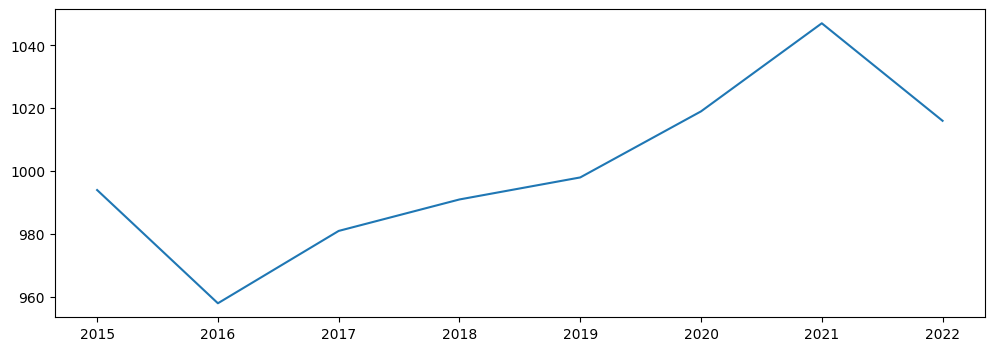

In [47]:
kill_by_year=df_fatalities.groupby('Year').agg({'state': pd.Series.count})
plt.figure(figsize=(12,4))
plt.plot(kill_by_year)

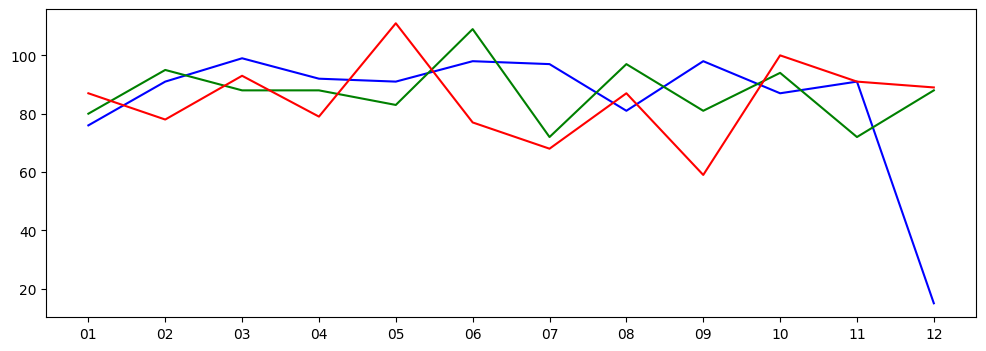

In [48]:
plt.figure(figsize=(12,4))
plt.plot(df_fatalities[df_fatalities.Year=='2022'].groupby('Month').agg({'state': pd.Series.count}), color='blue')
plt.plot(df_fatalities[df_fatalities.Year=='2021'].groupby('Month').agg({'state': pd.Series.count}), color='green')
plt.plot(df_fatalities[df_fatalities.Year=='2020'].groupby('Month').agg({'state': pd.Series.count}), color='red')

In [49]:
df_fatalities.Year.value_counts()

2021    1047
2020    1019
2022    1016
2019     998
2015     994
2018     991
2017     981
2016     958
Name: Year, dtype: int64